# Simple Classification

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
data = pd.read_csv("Social_Network_Ads.csv")
data.drop(columns=['EstimatedSalary'], inplace=True)
data.head()

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0


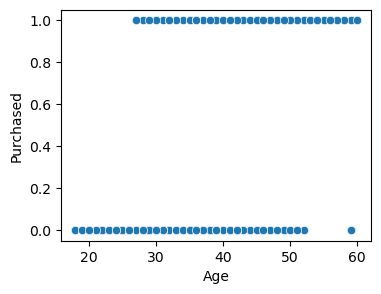

In [189]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="Age", y="Purchased", data=data)
plt.show()

In [190]:
x = data[["Age"]]
y = data["Purchased"]

In [191]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.2, random_state=42)

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [194]:
lr.score(x_test , y_test)*100

91.25

In [195]:
lr.predict([[40]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

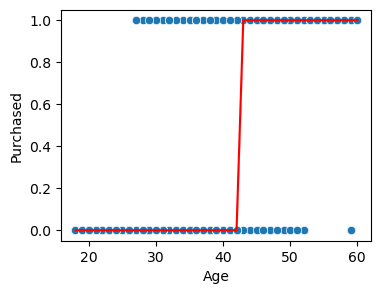

In [196]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="Age", y="Purchased", data=data)
sns.lineplot(x="Age", y= lr.predict(x), data=data, color = 'red')
plt.show()

# Multiple Inputs Classification

In [197]:
dataset = pd.read_csv("placement.csv")
dataset.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [198]:
dataset = dataset.rename(columns={"resume_score":"score"})

In [199]:
dataset.head()

,cgpa,score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


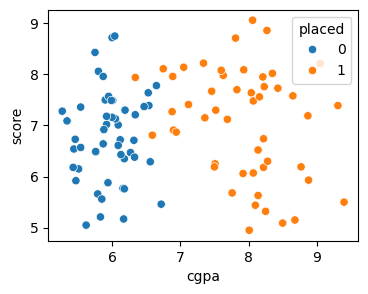

In [200]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="cgpa", y="score", data=dataset, hue="placed")
plt.show()

In [201]:
X = dataset.iloc[:,:-1]
Y = dataset["placed"]

In [202]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [203]:
lor = LogisticRegression()
lor.fit(X_train ,Y_train)

LogisticRegression()

In [204]:
lor.score(X_test, Y_test)*100

100.0

In [205]:
lor.predict([[8.14,6.52]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [206]:
lor.predict(X_test)

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [207]:
Y_test.head()

83    1
53    0
70    1
45    1
44    0
Name: placed, dtype: int64

In [208]:
from mlxtend.plotting import plot_decision_regions

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


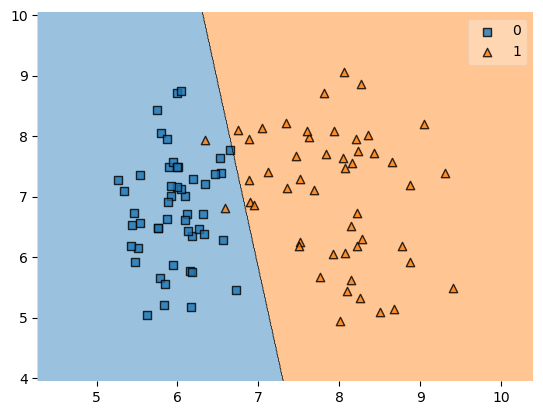

In [209]:
plot_decision_regions(X.to_numpy(), Y.to_numpy(), clf=lor)
plt.show()

# Polynomial

## Simple Poly

In [210]:
dataset1 = pd.read_csv("Polynomial.csv")
dataset1.head()

,Feature1,Feature2,Label
0,0.548814,0.715189,0
1,0.602763,0.544883,1
2,0.423655,0.645894,1
3,0.437587,0.891773,0
4,0.963663,0.383442,1


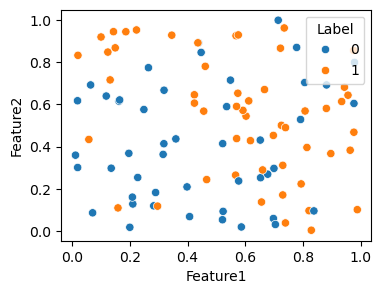

In [211]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="Feature1", y="Feature2", data=dataset1, hue="Label")
plt.show()

In [212]:
input = dataset1.iloc[:,:-1]
output = dataset1["Label"]

In [213]:
input_train , input_test , output_train , output_test = train_test_split(input,output, test_size=0.2, random_state=52)

In [214]:
lr1 =  LogisticRegression()
lr1.fit(input_train , output_train)

LogisticRegression()

In [215]:
lr1.score(input_test , output_test)*100

80.0

In [216]:
lr1.predict([[0.548814,0.715189]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [217]:
lr1.predict(input_test)

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [218]:
output_test.head()

82    1
8     1
44    1
19    1
2     1
Name: Label, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


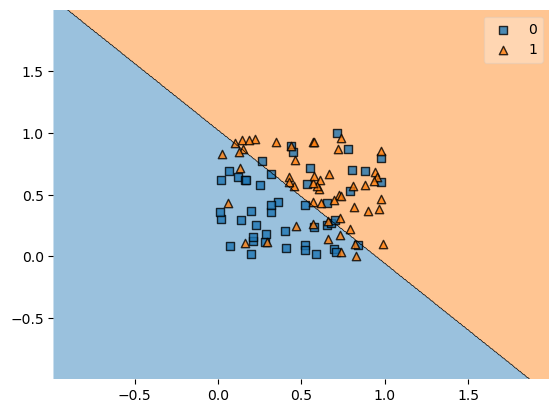

In [219]:
plot_decision_regions(input.to_numpy(), output.to_numpy(), clf=lr1)
plt.show()

## Polynomial

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [221]:
poly = PolynomialFeatures(degree=4)
model_poly = make_pipeline(poly, LogisticRegression())
model_poly.fit(input_train , output_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('logisticregression', LogisticRegression())])

In [222]:
model_poly.score(input_test , output_test)*100

95.0

In [223]:
model_poly.predict([[0.548814,0.715189]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [224]:
model_poly.predict(input_test)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [225]:
output_test.head()

82    1
8     1
44    1
19    1
2     1
Name: Label, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


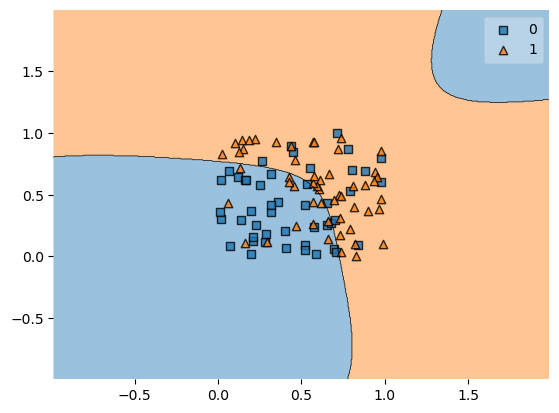

In [226]:
plot_decision_regions(input.to_numpy(), output.to_numpy(), clf=model_poly)
plt.show()

# Multiclass Classification

In [246]:
data1 = sns.load_dataset("iris")
data1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [247]:
data1["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

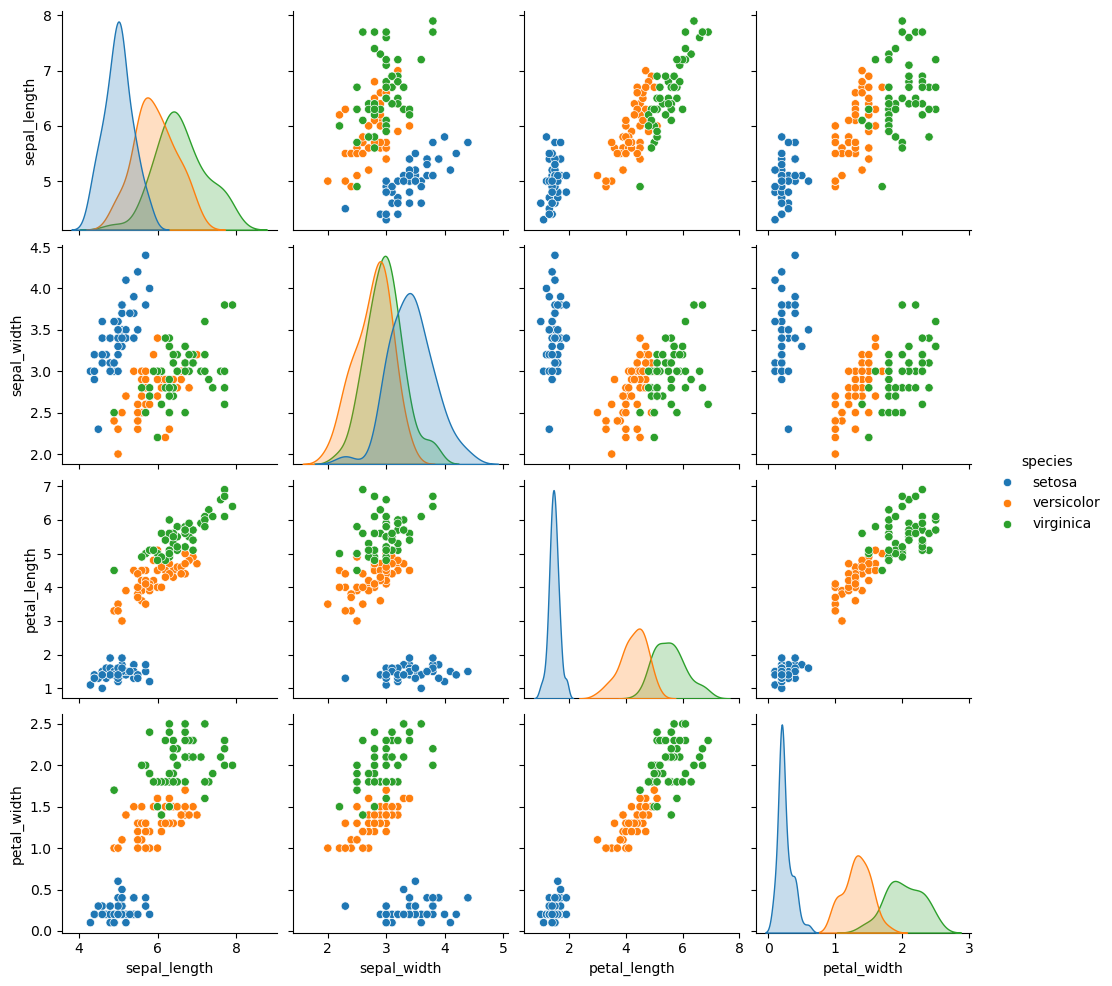

In [248]:
sns.pairplot(data=data1, hue="species")
plt.show()

In [249]:
x1 = data1.iloc[:,:-1]
y1 = data1["species"]

In [250]:
x1_train , x1_test , y1_train , y1_test = train_test_split(x1,y1, test_size=0.2, random_state=52)

## OVR method

In [251]:
lr2 = LogisticRegression(multi_class="ovr")
lr2.fit(x1_train , y1_train)

LogisticRegression(multi_class='ovr')

In [252]:
lr2.score(x1_test , y1_test)*100

96.66666666666667

## Multinomial method

In [259]:
lr3 =  LogisticRegression(multi_class='multinomial')
lr3.fit(x1_train , y1_train)

LogisticRegression(multi_class='multinomial')

In [260]:
lr3.score(x1_test , y1_test)*100

96.66666666666667